## Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def estimate_coef(x, y):
    #number of observations/ points
    n= np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    #calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    #calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return(b_0, b_1)

In [3]:

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color="m",
                marker="o", s=30)

    # predicted response vector
    y_pred = b[0] + b[1] * x

    # plotting the regression line
    plt.plot(x, y_pred, color="g")

    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')


Estimated coefficients:
b_0 = 1.2363636363636363
b_1 = 1.1696969696969697


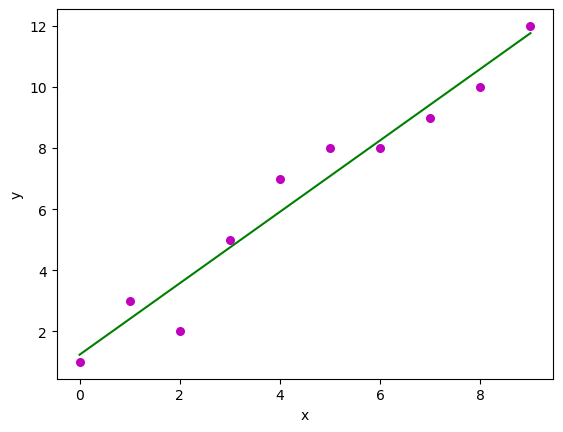

In [5]:
def main():
    # observations / data
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0], b[1]))

    # plotting regression line
    plot_regression_line(x, y, b)
    plt.show()


if __name__ == "__main__":
    main()


<h3> Multiple Linear Regression </h3>

In [18]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
import pandas as pd
import scipy.stats as stats


The code downloads the Boston Housing dataset from the provided URL and reads it into a Pandas DataFrame (raw_df)

In [32]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)

raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


This extracts the input variables (X) and target variable (y) from the DataFrame. The input variables are selected from every other row to match the target variable, which is available every other row.

In [33]:
X = np.hstack([raw_df.values[::2, :],raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

#### Splitting Data into Training and Testing Sets

Here it divides the data into training and testing sets using the train_test_split() function from scikit-learn. The test_size parameter specifies that 40% of the data should be used for testing.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4,random_state=42)



#### Creating and Training the Linear Regression Model

This initializes a LinearRegression object (reg) and trains the model using the training data (X_train, y_train)

In [35]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

#### Evaluating Model Performance

Evaluates the model's performance by printing the regression coefficients and calculating the variance score, which measures the proportion of explained variance. A score of 1 indicates perfect prediction.

In [37]:
# regression coefficients
print('Coefficients:', reg.coef_)

Coefficients: [-1.13498178e-01  3.79976868e-02  2.99876109e-02  3.51131977e+00
 -1.44513558e+01  3.80534175e+00 -1.79553906e-02 -1.48968845e+00
  2.53016064e-01 -1.00262729e-02 -8.86408743e-01  1.08462004e-02
 -5.75917903e-01]


#### Plotting Residual Errors
Plotting and analyzing the residual errors, which represent the difference between the predicted values and the actual values.

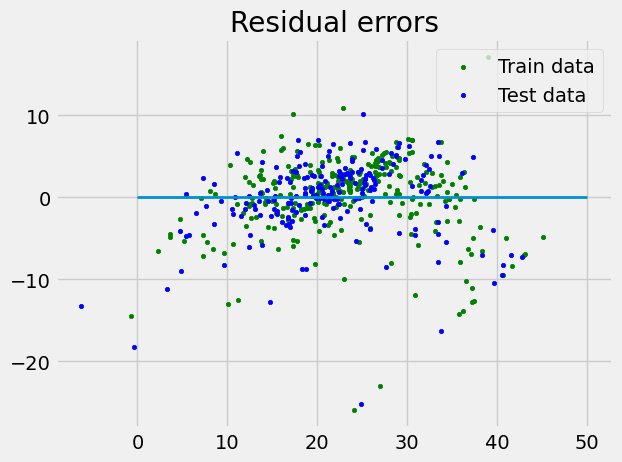

In [38]:
# plot for residual error

# setting plot style
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(reg.predict(X_train),
            reg.predict(X_train) - y_train,
            color="green", s=10,
            label='Train data')

# plotting residual errors in test data
plt.scatter(reg.predict(X_test),
            reg.predict(X_test) - y_test,
            color="blue", s=10,
            label='Test data')

# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

# plotting legend
plt.legend(loc='upper right')

# plot title
plt.title("Residual errors")

# method call for showing the plot
plt.show()

In the above example, we determine the accuracy score using Explained Variance Score. We define:

explained_variance_score = 1 - Var{y - y'}/Var{y}

where y' is the estimated target output, y is the corresponding (correct) target output, and Var is Variance, the square of the standard deviation. The best possible score is 1.0, lower values are worse.